    HISTORICAL INVESTMENT RETURNS CALCULATOR

This model calculates the historical returns of periodic investments based on real stock prices. You can test it with any U.S. stock and adjust the investment amounts and time periods to see different scenarios.
Additionally, the model allows you to compare the performance of two stocks side by side.

Model Limitations: This model does not account for dividends and is intended for use only with U.S. stocks and ETFs

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
#os.getcwd()
#os.chdir(r"C:\Users\PC\Desktop\python files")

Select the stocks, time period, and investment amount you want to evaluate. You can find stock tickers at: https://finance.yahoo.com/

Enter your input:

In [4]:
#Select the stocks:
stock1 = 'AAPL' # Apple Inc. stock ticker
stock2 = 'NVDA' # NVIDIA Corporation ticker

#Select the period:
start_date = '2020-07-01'
end_date = '2025-07-01'

#Select the investment amount:
initial_investment = 1000
monthly_contribution = 200



In [5]:
# Getting financial data from Yahoo Finance:

import yfinance as yf

stock_price = yf.download([stock1, stock2], start= start_date, end= end_date, interval='1d')

#This model evaluates the performance of US stocks. Therefore, we must convert EUR to USD.
rate = yf.download('EURUSD=X', start=start_date, end= end_date, interval='1d')

# Deleting irrelevant columns — for this simulation, we only need the opening price. We assume the investment is made when the market opens.
stock_price = stock_price.drop(columns=['Close', 'High', 'Low', 'Volume'], level=0)
rate = rate.drop(columns=['Close', 'High', 'Low', 'Volume'], level=0)

data = pd.merge(stock_price, rate, on= 'Date')

# In this simulation, the investment is made on the first business day of each month.
data = data.resample('BMS').first()

#Data must be sorted from oldest to newest to calculate the portfolio value.
data = data.sort_index(ascending=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_26644\2408062814.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_price = yf.download([stock1, stock2], start= start_date, end= end_date, interval='1d')
[*********************100%***********************]  2 of 2 completed
C:\Users\PC\AppData\Local\Temp\ipykernel_26644\2408062814.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  rate = yf.download('EURUSD=X', start=start_date, end= end_date, interval='1d')
[*********************100%***********************]  1 of 1 completed


In [6]:
#Adding initial investment and monthly contribution to dataframe.
months = data.shape[0] - 1
investment = [initial_investment] + [monthly_contribution] * months
investment_series = pd.Series(investment, index=data.index)

data['investment'] = investment_series

# Removing MultiIndex
data.columns = ['_'.join(filter(None, col)).strip() for col in data.columns]

#Renaming
data = data.rename(columns={'Open_EURUSD=X': 'EURUSD'})

#Using iloc to keep the model dynamic.
data.iloc[:,0] = data.iloc[:,0].round(2)
data.iloc[:,1] = data.iloc[:,1].round(2)
data.iloc[:,2] = data.iloc[:,2].round(2)

# Calculating how many shares purchased
data['investment_USD'] = data['investment'] * data['EURUSD']
data[f'{stock1}_shares_purchased'] = ((data['investment_USD'] * 0.999) / data.iloc[:,0]).round(2) # 0.1% is the brokers fee for the transaction
data[f'{stock2}_shares_purchased'] = ((data['investment_USD'] * 0.999) / data.iloc[:,1]).round(2)

# Summing the shares acquired and the total amount invested.
data[f'{stock1}_shares_acc'] = data[f'{stock1}_shares_purchased'].cumsum()
data[f'{stock2}_shares_acc'] = data[f'{stock2}_shares_purchased'].cumsum()

data['sum_invested'] = data['investment'].cumsum()

# Calculating the portfolio value in Euros.
data[f'{stock1}_shares_value_EUR'] = ((data[f'{stock1}_shares_acc'] * data.iloc[:,0]) / data['EURUSD']).round(2)
data[f'{stock2}_shares_value_EUR'] = ((data[f'{stock2}_shares_acc'] * data.iloc[:,1]) / data['EURUSD']).round(2)

# Calculating the profit
data[f'{stock1}_profit'] = (data[f'{stock1}_shares_value_EUR'] - data['sum_invested']).round(2)
data[f'{stock2}_profit'] = (data[f'{stock2}_shares_value_EUR'] - data['sum_invested']).round(2)

data[f'{stock1}_profit_margin'] = (data[f'{stock1}_profit']/ data['sum_invested']).round(2)
data[f'{stock2}_profit_margin'] = (data[f'{stock2}_profit']/ data['sum_invested']).round(2)

data.tail(5)


,Open_AAPL,Open_NVDA,EURUSD,investment,investment_USD,AAPL_shares_purchased,NVDA_shares_purchased,AAPL_shares_acc,NVDA_shares_acc,sum_invested,AAPL_shares_value_EUR,NVDA_shares_value_EUR,AAPL_profit,NVDA_profit,AAPL_profit_margin,NVDA_profit_margin
Date,,,,,,,,,,,,,,,,
2025-02-03,229.44,114.73,1.02,200,204.0,0.89,1.78,90.81,629.61,12000,20426.91,70818.78,8426.91,58818.78,0.70,4.90
2025-03-03,241.47,123.49,1.04,200,208.0,0.86,1.68,91.67,631.29,12200,21284.19,74959.62,9084.19,62759.62,0.74,5.14
2025-04-01,219.52,108.51,1.08,200,216.0,0.98,1.99,92.65,633.28,12400,18831.97,63627.05,6431.97,51227.05,0.52,4.13
2025-05-01,208.81,113.07,1.13,200,226.0,1.08,2.00,93.73,635.28,12600,17320.14,63567.35,4720.14,50967.35,0.37,4.05
2025-06-02,200.28,135.48,1.14,200,228.0,1.14,1.68,94.87,636.96,12800,16667.16,75697.67,3867.16,62897.67,0.30,4.91


Let's look at how the value of the shares grew:

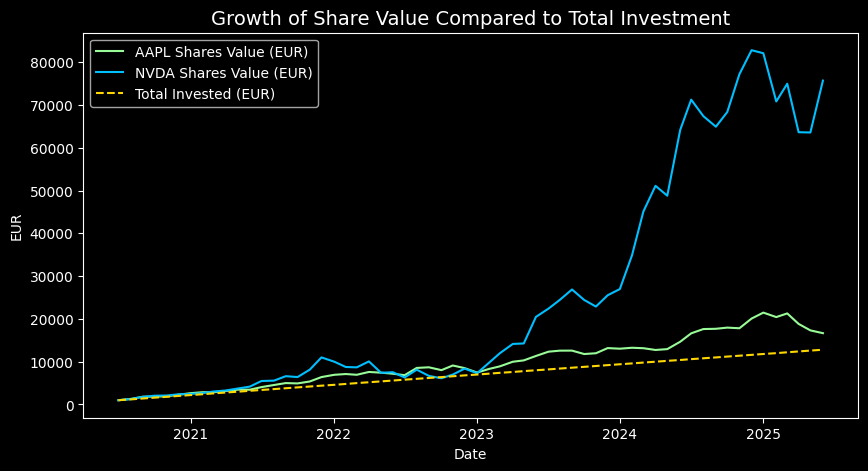

In [7]:
# Creating a line chart

plt.style.use('dark_background') 
plt.figure(figsize=(10, 5))

plt.plot(data.index, data[f'{stock1}_shares_value_EUR'], label= f'{stock1} Shares Value (EUR)', color='palegreen')
plt.plot(data.index, data[f'{stock2}_shares_value_EUR'], label= f'{stock2} Shares Value (EUR)', color='deepskyblue')
plt.plot(data.index, data['sum_invested'], label='Total Invested (EUR)', color='gold', linestyle='--')

plt.title('Growth of Share Value Compared to Total Investment', fontsize=14)
plt.xlabel('Date')
plt.ylabel('EUR')
plt.legend()
plt.grid(False)

plt.show()


RESULTS:

In [8]:

print(f"Amount invested: {data['sum_invested'].iloc[-1]} EUR")
print()
print(f"{stock1} shares value: {data.iloc[-1,10]} Eur")
print(f"{stock2} shares value: {data.iloc[-1,11]} Eur")
print()
print(f"{stock1} profit: {data.iloc[-1,12]} Eur")
print(f"{stock2} profit: {data.iloc[-1,13]} Eur")
print()
print(f"{stock1} profit margin: {(data.iloc[-1,14] * 100).round(2)} %")
print(f"{stock2} profit margin: {(data.iloc[-1,15] * 100).round(2)} %")

Amount invested: 12800 EUR

AAPL shares value: 16667.16 Eur
NVDA shares value: 75697.67 Eur

AAPL profit: 3867.16 Eur
NVDA profit: 62897.67 Eur

AAPL profit margin: 30.0 %
NVDA profit margin: 491.0 %
